In [1]:
import pandas as pd  
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataframe from csv file
df = pd.read_csv('survey_responses/survey_responses_2025_28_09.54.csv')
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,human_story,opro_joke,opro_poem,opro_sixword,opro_story,r1_joke,r1_poem,r1_sixword,r1_story,Create New Field or Choose From Dropdown...
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,human_story,opro_joke,opro_poem,opro_sixword,opro_story,r1_joke,r1_poem,r1_sixword,r1_story,Create New Field or Choose From Dropdown...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""human_story""}","{""ImportId"":""opro_joke""}","{""ImportId"":""opro_poem""}","{""ImportId"":""opro_sixword""}","{""ImportId"":""opro_story""}","{""ImportId"":""r1_joke""}","{""ImportId"":""r1_poem""}","{""ImportId"":""r1_sixword""}","{""ImportId"":""r1_story""}","{""ImportId"":""Create New Field or Choose From D..."
2,2025-02-17 14:13:20,2025-02-17 14:13:20,Survey Preview,NaN,100,0,True,2025-02-17 14:13:20,R_5Ih3LGDSj9xA8k9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-17 14:13:26,2025-02-17 14:13:26,Survey Preview,NaN,100,0,True,2025-02-17 14:13:27,R_5dGIe8lW77IicZg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-17 14:13:31,2025-02-17 14:13:31,Survey Preview,NaN,100,0,True,2025-02-17 14:13:32,R_5fCO9eGtcpGlhcD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2025-02-19 09:59:59,2025-02-19 10:00:06,IP Address,73.181.240.29,1,7,False,2025-02-26 10:00:16,R_140ZjARvYrY2Vnj,NaN,...,"""Smoke curled into the midnight air as Ava gri...",Why did the mathematician become a gardener? B...,"""In the hollow of solitude's breath, <br>\nwh...",Her shadow lingered; he danced alone.,"""I tumble from the swollen cloud, a raindrop c...","""😎 Why did the sunglasses emoji and the ice cu...","""Beneath the clock’s unblinking eye,<br>\nseas...",Library closed. All stories left untold.,"""The Locket Paradox<br>\nOn her 30th birthday,...",NaN
132,2025-02-19 12:20:44,2025-02-19 12:20:48,IP Address,192.34.255.222,1,4,False,2025-02-26 12:20:51,R_68A5JpabJR0h0Ap,NaN,...,"""In the heart of the bustling city, beneath th...",Why don't quantum physicists play hide and see...,"""In the hollow of silence, <br>\na lone lante...",Moonlight kissed gravestone; memories whispere...,"""I am born in a thunderous cloud, teeming with...","""Why did the sunglasses go to school?<br>\nTo ...","""Beneath the whispers of maple,<br>\na clockwo...",The old piano whispered forgotten songs.,"""The last train rumbled through the abandoned ...",NaN
133,2025-02-19 19:45:35,2025-02-19 19:45:45,IP Address,160.39.3.253,1,10,False,2025-02-26 19:45:53,R_7nux7fvtatT8xgy,NaN,...,"""The storm swallowed the horizon, its teeth gn...",Why don't quantum physicists play hide and see...,"""In the hollow of silence, <br>\ngrief waltze...",Her shadow lingered; he danced alone.,"""I am born from a cloud pregnant with stories,...","""Why did the mitochondria bring a ladder to th...","""Beneath the moon’s unblinking eye,<br>\nThe w...","""I killed him,"" the clock confessed.","""The clock ticked once, twice, thrice—each chi...",NaN
134,2025-02-19 21:10:54,2025-02-19 21:12:59,IP Address,102.89.68.159,1,125,False,2025-02-26 21:13:03,R_8jYQ7lBph5FzRjW,NaN,...,"""The storm swallowed the horizon, its teeth gn...",Why don't parallel universes ever host comedy ...,"""In the hollow of silence, <br>\na lone lante...",Moonlit beach proposal; tides whispered goodbye.,"""I tumble from the swollen cloud, a raindrop c...","""Why did the giraffe and seal start a circus?

In [3]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q3', 'Q7', 'Q9', 'Q64', 'Q65',
       'Q66', 'Q84', 'Q85', 'Q86', 'Q89', 'Q90', 'Q91', 'Q49', 'Q50', 'Q51',
       'Q69', 'Q70', 'Q71', 'Q94', 'Q95', 'Q96', 'Q99', 'Q100', 'Q101', 'Q54',
       'Q55', 'Q56', 'Q74', 'Q75', 'Q76', 'Q104', 'Q105', 'Q106', 'Q109',
       'Q110', 'Q111', 'Q59', 'Q60', 'Q61', 'Q79', 'Q80', 'Q81', 'Q114',
       'Q115', 'Q116', 'Q119', 'Q120', 'Q121', 'Q92_1', 'Q92_2', 'Q92_3',
       'Q92_4', 'Q94_1', 'Q94_2', 'Q94_3', 'Q94_4', 'Q95_1', 'Q95_2', 'Q95_3',
       'Q95_4', 'Q96_1', 'Q96_2', 'Q96_3', 'Q96_4', 'basic_joke', 'basic_poem',
       'basic_sixword', 'basic_story', 'human_joke', 'human_poem',
       'human_sixword', 'human_story', 'op

In [4]:
# Rename duration column
df = df.rename(columns={'Duration (in seconds)': 'Duration'})

In [5]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration',
       'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName',
       'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
       'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
       'UserLanguage', 'Q3', 'Q7', 'Q9', 'Q64', 'Q65', 'Q66', 'Q84', 'Q85',
       'Q86', 'Q89', 'Q90', 'Q91', 'Q49', 'Q50', 'Q51', 'Q69', 'Q70', 'Q71',
       'Q94', 'Q95', 'Q96', 'Q99', 'Q100', 'Q101', 'Q54', 'Q55', 'Q56', 'Q74',
       'Q75', 'Q76', 'Q104', 'Q105', 'Q106', 'Q109', 'Q110', 'Q111', 'Q59',
       'Q60', 'Q61', 'Q79', 'Q80', 'Q81', 'Q114', 'Q115', 'Q116', 'Q119',
       'Q120', 'Q121', 'Q92_1', 'Q92_2', 'Q92_3', 'Q92_4', 'Q94_1', 'Q94_2',
       'Q94_3', 'Q94_4', 'Q95_1', 'Q95_2', 'Q95_3', 'Q95_4', 'Q96_1', 'Q96_2',
       'Q96_3', 'Q96_4', 'basic_joke', 'basic_poem', 'basic_sixword',
       'basic_story', 'human_joke', 'human_poem', 'human_sixword',
       'human_story', 'opro_joke', 'op

In [6]:
df["Duration"]

0        Duration (in seconds)
1      {"ImportId":"duration"}
2                            0
3                            0
4                            0
                ...           
131                          7
132                          4
133                         10
134                        125
135                          5
Name: Duration, Length: 136, dtype: object

In [7]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration,Finished,RecordedDate,ResponseId,RecipientLastName,...,human_story,opro_joke,opro_poem,opro_sixword,opro_story,r1_joke,r1_poem,r1_sixword,r1_story,Create New Field or Choose From Dropdown...
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,human_story,opro_joke,opro_poem,opro_sixword,opro_story,r1_joke,r1_poem,r1_sixword,r1_story,Create New Field or Choose From Dropdown...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""human_story""}","{""ImportId"":""opro_joke""}","{""ImportId"":""opro_poem""}","{""ImportId"":""opro_sixword""}","{""ImportId"":""opro_story""}","{""ImportId"":""r1_joke""}","{""ImportId"":""r1_poem""}","{""ImportId"":""r1_sixword""}","{""ImportId"":""r1_story""}","{""ImportId"":""Create New Field or Choose From D..."
2,2025-02-17 14:13:20,2025-02-17 14:13:20,Survey Preview,NaN,100,0,True,2025-02-17 14:13:20,R_5Ih3LGDSj9xA8k9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-17 14:13:26,2025-02-17 14:13:26,Survey Preview,NaN,100,0,True,2025-02-17 14:13:27,R_5dGIe8lW77IicZg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-17 14:13:31,2025-02-17 14:13:31,Survey Preview,NaN,100,0,True,2025-02-17 14:13:32,R_5fCO9eGtcpGlhcD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2025-02-19 09:59:59,2025-02-19 10:00:06,IP Address,73.181.240.29,1,7,False,2025-02-26 10:00:16,R_140ZjARvYrY2Vnj,NaN,...,"""Smoke curled into the midnight air as Ava gri...",Why did the mathematician become a gardener? B...,"""In the hollow of solitude's breath, <br>\nwh...",Her shadow lingered; he danced alone.,"""I tumble from the swollen cloud, a raindrop c...","""😎 Why did the sunglasses emoji and the ice cu...","""Beneath the clock’s unblinking eye,<br>\nseas...",Library closed. All stories left untold.,"""The Locket Paradox<br>\nOn her 30th birthday,...",NaN
132,2025-02-19 12:20:44,2025-02-19 12:20:48,IP Address,192.34.255.222,1,4,False,2025-02-26 12:20:51,R_68A5JpabJR0h0Ap,NaN,...,"""In the heart of the bustling city, beneath th...",Why don't quantum physicists play hide and see...,"""In the hollow of silence, <br>\na lone lante...",Moonlight kissed gravestone; memories whispere...,"""I am born in a thunderous cloud, teeming with...","""Why did the sunglasses go to school?<br>\nTo ...","""Beneath the whispers of maple,<br>\na clockwo...",The old piano whispered forgotten songs.,"""The last train rumbled through the abandoned ...",NaN
133,2025-02-19 19:45:35,2025-02-19 19:45:45,IP Address,160.39.3.253,1,10,False,2025-02-26 19:45:53,R_7nux7fvtatT8xgy,NaN,...,"""The storm swallowed the horizon, its teeth gn...",Why don't quantum physicists play hide and see...,"""In the hollow of silence, <br>\ngrief waltze...",Her shadow lingered; he danced alone.,"""I am born from a cloud pregnant with stories,...","""Why did the mitochondria bring a ladder to th...","""Beneath the moon’s unblinking eye,<br>\nThe w...","""I killed him,"" the clock confessed.","""The clock ticked once, twice, thrice—each chi...",NaN
134,2025-02-19 21:10:54,2025-02-19 21:12:59,IP Address,102.89.68.159,1,125,False,2025-02-26 21:13:03,R_8jYQ7lBph5FzRjW,NaN,...,"""The storm swallowed the horizon, its teeth gn...",Why don't parallel universes ever host comedy ...,"""In the hollow of silence, <br>\na lone lante...",Moonlit beach proposal; tides whispered goodbye.,"""I tumble from the swollen cloud, a raindrop c...","""Why did the giraffe and seal start a circus?<...","""Bene

In [8]:
# Get average duration when progress is 100%
trim_df = df.iloc[2:, :]
trim_df['Duration'] = trim_df['Duration'].replace('None', 0)
trim_df['Duration'] = trim_df['Duration'].astype(float)
trim_df['Progress'] = trim_df['Progress'].astype(float)
# Select rows where progress is 100% and distribution channel is not preview
duration_df = trim_df[(trim_df['Progress'] == 100) & (trim_df['DistributionChannel'] != 'preview')]["Duration"]
duration_df

/tmp/ipykernel_249905/3628546455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_df['Duration'] = trim_df['Duration'].replace('None', 0)
/tmp/ipykernel_249905/3628546455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_df['Duration'] = trim_df['Duration'].astype(float)
/tmp/ipykernel_249905/3628546455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

16      593.0
17     1201.0
18      847.0
19      962.0
20      880.0
       ...   
82    30952.0
83      755.0
84    47796.0
85     1396.0
86     1678.0
Name: Duration, Length: 71, dtype: float64

In [9]:
duration_df.median() / 60

np.float64(14.566666666666666)

In [10]:
def rename_columns(df):
    methods = ["basic", "human", "opro", "r1"]
    domains = ["joke", "poem", "six-word", "story"]
    new_column_names = []
    for domain in domains:
        for method in methods:
            for quality in ["quality", "novelty", "creative"]:
                new_column_names.append(f"{method}_{domain}_{quality}")
    old_column_names = list(df.columns[17:17+len(new_column_names)])
    # Rename columns
    df.rename(columns=dict(zip(old_column_names, new_column_names)), inplace=True)
    # Rename preference columns
    old_column_names = list(df.columns[17+len(new_column_names):81])
    new_column_names = []
    for domain in domains:
        for method in methods:
            new_column_names.append(f"{method}_{domain}_pref")
    # Rename columns
    df.rename(columns=dict(zip(old_column_names, new_column_names)), inplace=True)
    return df

In [11]:
renamed_df = rename_columns(df)
renamed_df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration',
       'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName',
       'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
       'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
       'UserLanguage', 'basic_joke_quality', 'basic_joke_novelty',
       'basic_joke_creative', 'human_joke_quality', 'human_joke_novelty',
       'human_joke_creative', 'opro_joke_quality', 'opro_joke_novelty',
       'opro_joke_creative', 'r1_joke_quality', 'r1_joke_novelty',
       'r1_joke_creative', 'basic_poem_quality', 'basic_poem_novelty',
       'basic_poem_creative', 'human_poem_quality', 'human_poem_novelty',
       'human_poem_creative', 'opro_poem_quality', 'opro_poem_novelty',
       'opro_poem_creative', 'r1_poem_quality', 'r1_poem_novelty',
       'r1_poem_creative', 'basic_six-word_quality', 'basic_six-word_novelty',
       'basic_six-word_creative', 'human_six-word_quality',
       'hu

In [12]:
len(renamed_df)

136

In [13]:
def clean(df):
    # Remove rows where `DistributionChannel` is `preview`
    clean_df = renamed_df[renamed_df['DistributionChannel'] != 'preview']
    return clean_df


In [14]:
clean_df = clean(renamed_df)
len(clean_df)

122

In [15]:
# Likert scale score mapping
likert_mapping = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Strongly agree": 5
}
preference_mapping = {
    1 : 4,
    2 : 3,
    3 : 2,
    4 : 1
}

In [16]:
pd.set_option('future.no_silent_downcasting', True)

def get_char_df(df):
    # Select columns from 17 to 81 but keep a dataframe
    # with the same number of rows as the original dataframe
    # and the same column names
    # but with the values replaced by the likert mapping
    char_df = df.iloc[2:, 17:65]
    # Replace values in the dataframe with the likert mapping
    char_df = char_df.replace(likert_mapping)
    # Replace NaN with 3
    char_df = char_df.fillna(3)
    # Force numeric
    char_df = char_df.astype(int)
    return char_df
char_df = get_char_df(clean_df)
char_df

,basic_joke_quality,basic_joke_novelty,basic_joke_creative,human_joke_quality,human_joke_novelty,human_joke_creative,opro_joke_quality,opro_joke_novelty,opro_joke_creative,r1_joke_quality,...,basic_story_creative,human_story_quality,human_story_novelty,human_story_creative,opro_story_quality,opro_story_novelty,opro_story_creative,r1_story_quality,r1_story_novelty,r1_story_creative
16,4,4,4,3,3,3,3,3,3,5,...,3,3,3,3,3,3,3,3,3,3
17,2,3,4,1,5,3,1,4,4,1,...,5,5,5,5,4,5,4,3,4,2
18,3,3,3,2,2,2,3,4,4,2,...,4,4,4,4,3,3,3,2,3,4
19,4,4,3,1,3,3,1,3,3,4,...,4,2,3,3,2,2,2,3,4,3
20,4,4,3,3,2,2,3,4,4,3,...,2,5,5,3,4,4,3,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
132,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
133,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
134,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [17]:
def get_mean_scores(df, categories=[]):
    """Get the mean Likert scores for each method averaged across all domains. With the 
    the margin of error of the mean."""
    # Get the mean Likert scores for each method averaged across all domains
    mean_likert_scores = {}
    for cat in categories:
        # Get the columns for the method
        cat_columns = [col for col in df.columns if cat in col]
        # Get the mean of the columns
        column_mean = df[cat_columns].mean(axis=1)
        # Get the mean of the mean
        mean_likert_scores[cat] = column_mean.mean()
        # Get the margin of error of the mean
        mean_likert_scores[cat + "_moe"] = column_mean.sem() * 1.96
    return mean_likert_scores

method_scores = get_mean_scores(char_df, categories=["basic", "human", "opro", "r1"])    
method_scores

{'basic': np.float64(3.2777777777777777),
 'basic_moe': np.float64(0.09210231199644653),
 'human': np.float64(3.3277777777777775),
 'human_moe': np.float64(0.09041134111802357),
 'opro': np.float64(3.26875),
 'opro_moe': np.float64(0.08615210730842233),
 'r1': np.float64(3.2368055555555553),
 'r1_moe': np.float64(0.08612029705379134)}

In [18]:
method_scores["human"] - method_scores["r1"]

np.float64(0.09097222222222223)

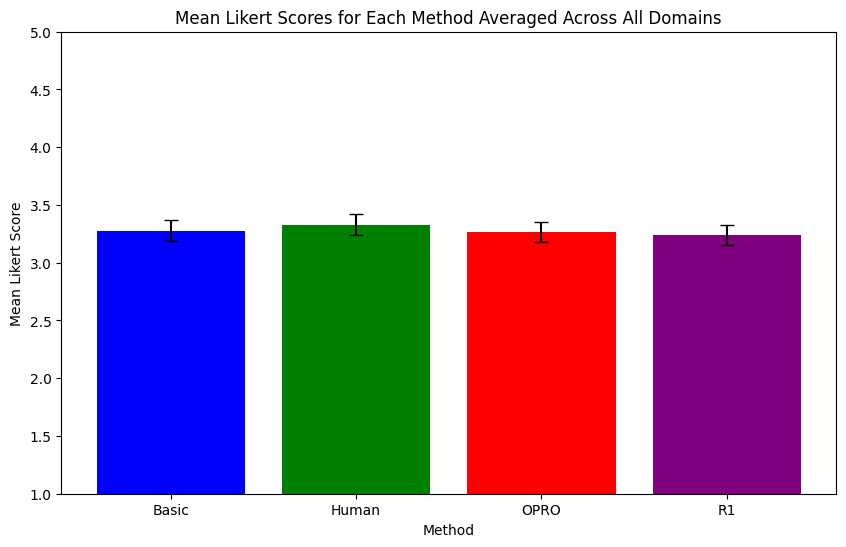

In [19]:
import matplotlib.pyplot as plt

def plot_mean_scores(scores, categories=[], xlabel="", ylabel="Mean Score", title="", save_path=None, show=True, ylim=None):
    """Plot the mean Likert scores for each method averaged across all domains."""
    # Generate bar graph of mean Likert scores for each method
    means = [scores[cat.lower().replace(" ", "_")] for cat in categories]
    errors = [scores[cat.lower().replace(" ", "_") + '_moe'] for cat in categories]

    plt.figure(figsize=(10, 6))
    plt.bar(categories, means, yerr=errors, capsize=5, color=['blue', 'green', 'red', 'purple'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if ylim:
        plt.ylim(ylim)
    # Set y-axis limits
    plt.title(title)
    # Save the plot
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)
    if show:
        plt.show()

plot_mean_scores(method_scores, categories=["Basic", "Human", "OPRO", "R1"], 
                        xlabel="Method", 
                        ylabel="Mean Likert Score", 
                        ylim=(1, 5),
                        title="Mean Likert Scores for Each Method Averaged Across All Domains",
                        save_path="figures/method_mean_likert_scores.png")

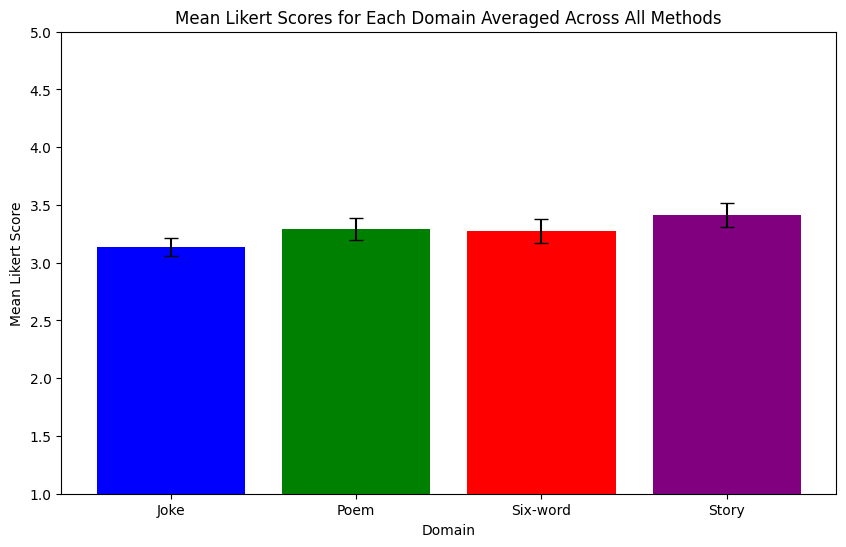

In [20]:
mean_domain_scores = get_mean_scores(char_df, categories=["joke", "poem", "six-word", "story"])
plot_mean_scores(mean_domain_scores, categories=["Joke", "Poem", "Six-word", "Story"], xlabel="Domain", ylabel="Mean Likert Score",ylim=(1,5), save_path="figures/domain_mean_likert_scores_domain.png",title="Mean Likert Scores for Each Domain Averaged Across All Methods")

In [21]:
mean_domain_scores

{'joke': np.float64(3.134722222222222),
 'joke_moe': np.float64(0.07799690537219921),
 'poem': np.float64(3.290972222222222),
 'poem_moe': np.float64(0.0979350842549898),
 'six-word': np.float64(3.2715277777777776),
 'six-word_moe': np.float64(0.1028751210543809),
 'story': np.float64(3.413888888888889),
 'story_moe': np.float64(0.10090290277263983)}

In [22]:

pref_only_df = pd.read_csv('survey_responses/preferences_only_2025_28_09.57.csv')
# Rename preference columns
old_column_names = list(pref_only_df.columns[17:17+4*4])
print(old_column_names)
new_column_names = []
domains = ["joke", "poem", "six-word", "story"]
methods = ["basic", "human", "opro", "r1"]
for domain in domains:
    for method in methods:
        new_column_names.append(f"{method}_{domain}_pref")
# Rename columns
print(new_column_names)
pref_only_df.rename(columns=dict(zip(old_column_names, new_column_names)), inplace=True)
# Drop rows where `DistributionChannel` is `preview`
pref_only_df = pref_only_df[pref_only_df['DistributionChannel'] != 'preview']
# Drop rows where `StartDate` before 12:24 PM on Feb 19, 2025
pref_df = clean_df[clean_df['StartDate'] > '2025-02-19 12:24:00']
pref_df = pref_df.iloc[2:, 65:81]
pref_only_df = pref_only_df.iloc[2:, 17:17+4*4] 
# Combine dataframes
pref_df = pd.concat([pref_df, pref_only_df], axis=0)
pref_df = pref_df.astype(float)
pref_df = pref_df.replace(preference_mapping)
pref_df

['Q92_1', 'Q92_2', 'Q92_3', 'Q92_4', 'Q94_1', 'Q94_2', 'Q94_3', 'Q94_4', 'Q95_1', 'Q95_2', 'Q95_3', 'Q95_4', 'Q96_1', 'Q96_2', 'Q96_3', 'Q96_4']
['basic_joke_pref', 'human_joke_pref', 'opro_joke_pref', 'r1_joke_pref', 'basic_poem_pref', 'human_poem_pref', 'opro_poem_pref', 'r1_poem_pref', 'basic_six-word_pref', 'human_six-word_pref', 'opro_six-word_pref', 'r1_six-word_pref', 'basic_story_pref', 'human_story_pref', 'opro_story_pref', 'r1_story_pref']


,basic_joke_pref,human_joke_pref,opro_joke_pref,r1_joke_pref,basic_poem_pref,human_poem_pref,opro_poem_pref,r1_poem_pref,basic_six-word_pref,human_six-word_pref,opro_six-word_pref,r1_six-word_pref,basic_story_pref,human_story_pref,opro_story_pref,r1_story_pref
79,3.0,4.0,1.0,2.0,3.0,4.0,1.0,2.0,3.0,2.0,4.0,1.0,3.0,4.0,1.0,2.0
80,2.0,4.0,1.0,3.0,3.0,4.0,2.0,1.0,4.0,2.0,1.0,3.0,4.0,3.0,1.0,2.0
81,4.0,3.0,1.0,2.0,3.0,4.0,1.0,2.0,2.0,1.0,4.0,3.0,1.0,4.0,3.0,2.0
83,4.0,3.0,2.0,1.0,4.0,3.0,2.0,1.0,4.0,3.0,2.0,1.0,1.0,4.0,3.0,2.0
85,1.0,2.0,3.0,4.0,4.0,1.0,3.0,2.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,2.0,1.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
len(pref_df)

63

In [24]:
mean_method_pref = get_mean_scores(pref_df, categories=["basic", "human", "opro", "r1"])
mean_method_pref

{'basic': np.float64(2.7412280701754383),
 'basic_moe': np.float64(0.19816327171214868),
 'human': np.float64(2.5241228070175437),
 'human_moe': np.float64(0.19115670526840425),
 'opro': np.float64(2.151315789473684),
 'opro_moe': np.float64(0.22708255040402026),
 'r1': np.float64(2.5833333333333335),
 'r1_moe': np.float64(0.23360202642283331)}

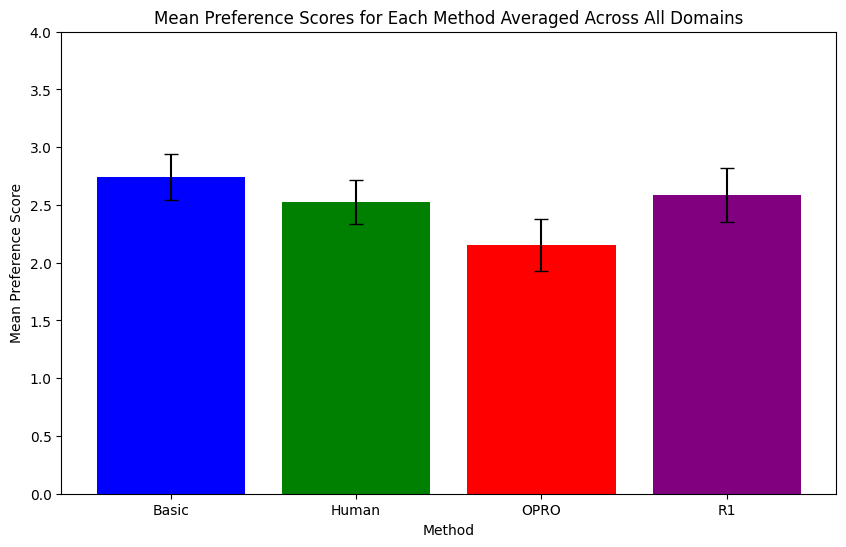

In [25]:
plot_mean_scores(mean_method_pref, categories=["Basic", "Human", "OPRO", "R1"], 
                        xlabel="Method", 
                        ylabel="Mean Preference Score", 
                        ylim=(0, 4),
                        title="Mean Preference Scores for Each Method Averaged Across All Domains",
                        save_path="figures/method_mean_pref_scores.png")

In [26]:
def get_char_scores(df):
    methods = ["basic", "human", "opro", "r1"]
    characteristics = ["quality", "novelty", "creative"]
    # Get the mean scores for each method and characteristic
    mean_scores = {}
    for method in methods:
        for characteristic in characteristics:
            # Get the columns for the method and characteristic
            columns = [col for col in char_df.columns if method in col and characteristic in col]
            # Get the mean of the columns
            column_mean = char_df[columns].mean(axis=1)
            # Get the mean of the mean
            mean_scores[f"{method}_{characteristic}"] = column_mean.mean()
            # Get the margin of error of the mean
            mean_scores[f"{method}_{characteristic}_moe"] = column_mean.sem() * 1.96
    return mean_scores
char_scores = get_char_scores(char_df)
char_scores


{'basic_quality': np.float64(3.2291666666666665),
 'basic_quality_moe': np.float64(0.10070490930520681),
 'basic_novelty': np.float64(3.2583333333333333),
 'basic_novelty_moe': np.float64(0.10675890619656789),
 'basic_creative': np.float64(3.345833333333333),
 'basic_creative_moe': np.float64(0.09895328831309172),
 'human_quality': np.float64(3.3291666666666666),
 'human_quality_moe': np.float64(0.1002698727715405),
 'human_novelty': np.float64(3.29375),
 'human_novelty_moe': np.float64(0.09290266754649674),
 'human_creative': np.float64(3.3604166666666666),
 'human_creative_moe': np.float64(0.10434763300176911),
 'opro_quality': np.float64(3.1479166666666667),
 'opro_quality_moe': np.float64(0.09849558108597589),
 'opro_novelty': np.float64(3.308333333333333),
 'opro_novelty_moe': np.float64(0.09767921354192986),
 'opro_creative': np.float64(3.35),
 'opro_creative_moe': np.float64(0.09623408959407263),
 'r1_quality': np.float64(3.0729166666666665),
 'r1_quality_moe': np.float64(0.0937

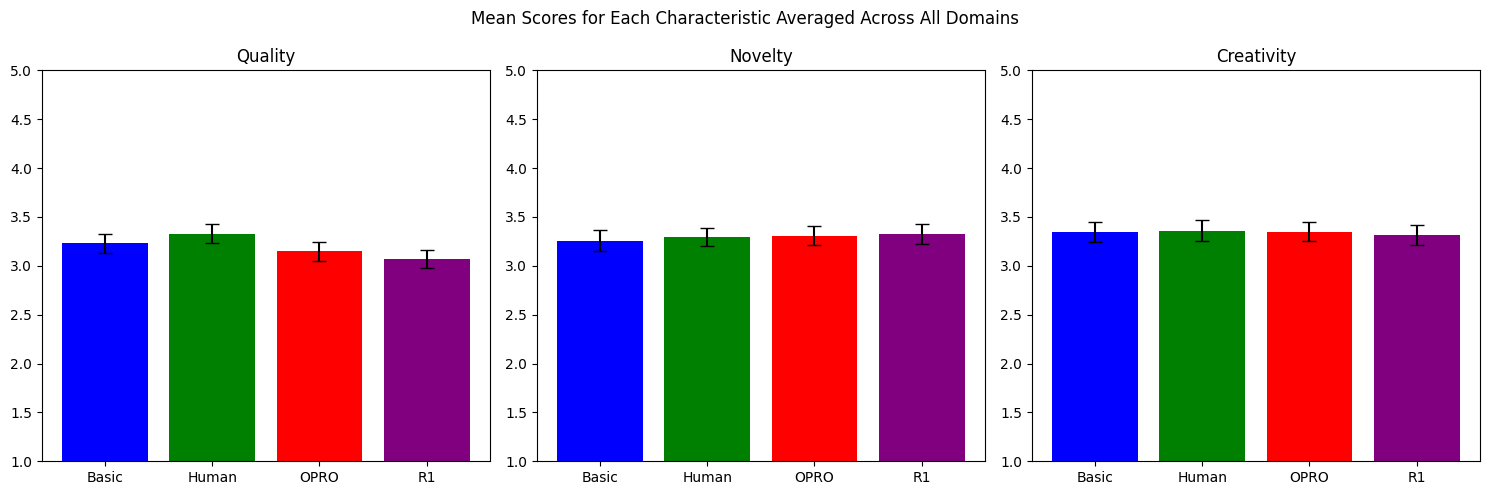

In [27]:
def plot_char_scores(char_scores, save_path=None):
    """Plot each of the characteristics for each method. Let each method be a subplot."""
    methods = ["basic", "human", "opro", "r1"]
    characteristics = ["quality", "novelty", "creative"]
    titles = ["Quality", "Novelty", "Creativity"]
    xlabels = ["Basic", "Human", "OPRO", "R1"]
    # Generate subplots for each characteristic
    fig, axs = plt.subplots(1, len(characteristics), figsize=(15, 5))
    for i, characteristic in enumerate(characteristics):
        means = [char_scores[f"{method}_{characteristic}"] for method in methods]
        errors = [char_scores[f"{method}_{characteristic}_moe"] for method in methods]
        axs[i].bar(xlabels, means, yerr=errors, capsize=5, color=['blue', 'green', 'red', 'purple'])
        axs[i].set_title(titles[i])
        axs[i].set_ylim(1, 5)

    plt.suptitle("Mean Scores for Each Characteristic Averaged Across All Domains")
    plt.tight_layout()
    # Save the plot
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()
plot_char_scores(char_scores, save_path="figures/char_scores.png")

In [131]:
# Compute the correlation between the characteristics
def compute_correlation(df, char1, char2):
    """Compute the correlation between two characteristics."""
    # Get the columns for the characteristics
    columns1 = [col for col in df.columns if char1 in col]
    columns2 = [col for col in df.columns if char2 in col]
    # Get the mean of the columns
    column_mean1 = df[columns1].mean(axis=1)
    column_mean2 = df[columns2].mean(axis=1)
    # Compute the correlation
    correlation = stats.pearsonr(column_mean1, column_mean2)
    return correlation
quality_novelty_corr = compute_correlation(char_df, "quality", "novelty")
quality_novelty_corr

PearsonRResult(statistic=np.float64(0.7666867690580608), pvalue=np.float64(1.8569279341572493e-24))

In [132]:
quality_creativity_corr = compute_correlation(char_df, "quality", "creative")
quality_creativity_corr

PearsonRResult(statistic=np.float64(0.7477855154472888), pvalue=np.float64(9.993667070830594e-23))

In [133]:
novelty_creativity_corr = compute_correlation(char_df, "novelty", "creative")
novelty_creativity_corr

PearsonRResult(statistic=np.float64(0.8485786131643318), pvalue=np.float64(2.0392689781684144e-34))

In [124]:
# Compute correlation between the scores
def compute_correlation(df):
    # Compute the correlation between the scores
    correlation = df.corr()
    return correlation
correlation = compute_correlation(char_scores_df)
correlation

,basic_quality,basic_novelty,basic_creative,human_quality,human_novelty,human_creative,opro_quality,opro_novelty,opro_creative,r1_quality,r1_novelty,r1_creative
basic_quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basic_novelty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basic_creative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
human_quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
human_novelty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
human_creative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opro_quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opro_novelty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opro_creative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r1_quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Create a table of the mean scores for each method and characteristic
def create_char_table(char_scores):
    """Create a table of the mean scores for each method and characteristic"""
    methods = ["basic", "human", "opro", "r1"]
    characteristics = ["quality", "novelty", "creative"]
    # Create a dataframe from the mean scores
    char_df = pd.DataFrame(columns=characteristics, index=methods)
    for method in methods:
        for characteristic in characteristics:
            char_df.loc[method, characteristic] = char_scores[f"{method}_{characteristic}"]
    # Add the margin of error to the dataframe
    for method in methods:
        for characteristic in characteristics:
            char_df.loc[method, characteristic + "_moe"] = char_scores[f"{method}_{characteristic}_moe"]
    # Round the values to 2 decimal places
    char_df = char_df.round(2)
    return char_df
char_table = create_char_table(char_scores)
char_table

,quality,novelty,creative,quality_moe,novelty_moe,creative_moe
basic,3.229167,3.258333,3.345833,0.10,0.11,0.1
human,3.329167,3.29375,3.360417,0.10,0.09,0.1
opro,3.147917,3.308333,3.35,0.10,0.10,0.1
r1,3.072917,3.322917,3.314583,0.09,0.10,0.1


In [29]:
# Significance testing
def get_significance(df):
    """Get the significance of the difference between each of the methods and store
    in a table"""
    methods = ["basic", "human", "opro", "r1"]
    # Get the significance of the difference between each of the methods
    significance = {}
    for i, method1 in enumerate(methods):
        for j, method2 in enumerate(methods):
            if i < j:
                method1_columns = [col for col in df.columns if method1 in col]
                method2_columns = [col for col in df.columns if method2 in col]
                # Compute the mean of each method
                method1_mean = df[method1_columns].mean(axis=1)
                method2_mean = df[method2_columns].mean(axis=1)
                # Get the t-test
                ttest = stats.ttest_rel(method1_mean, method2_mean)
                significance[f"{method1}_{method2}"] = ttest    
    return significance
significance = get_significance(char_df)

significance

{'basic_human': TtestResult(statistic=np.float64(-1.4960763730861417), pvalue=np.float64(0.1372812081675786), df=np.int64(119)),
 'basic_opro': TtestResult(statistic=np.float64(0.24328251523137506), pvalue=np.float64(0.8082054217990859), df=np.int64(119)),
 'basic_r1': TtestResult(statistic=np.float64(1.1644112169278924), pvalue=np.float64(0.24658649715142295), df=np.int64(119)),
 'human_opro': TtestResult(statistic=np.float64(1.84412768379706), pvalue=np.float64(0.06765189428269598), df=np.int64(119)),
 'human_r1': TtestResult(statistic=np.float64(2.76747011906664), pvalue=np.float64(0.006553075701903396), df=np.int64(119)),
 'opro_r1': TtestResult(statistic=np.float64(0.9517810112061788), pvalue=np.float64(0.3431372346915984), df=np.int64(119))}

In [30]:
for key, value in significance.items():
    print(key, value.pvalue < 0.05)

basic_human False
basic_opro False
basic_r1 False
human_opro False
human_r1 True
opro_r1 False


In [31]:
def get_pref_significance(df):
    methods = ["basic", "human", "opro", "r1"]
    # Get the significance of the difference between each of the methods
    significance = {}
    for i, method1 in enumerate(methods):
        for j, method2 in enumerate(methods):
            if i < j:
                method1_columns = [col for col in df.columns if method1 in col]
                method2_columns = [col for col in df.columns if method2 in col]
                # Compute the mean of each method
                
                method1_mean = df[method1_columns].mean(axis=1)
                method2_mean = df[method2_columns].mean(axis=1)
                # # Get the t-test
                # Replace nan with 2
                method1_mean = method1_mean.fillna(2)
                method2_mean = method2_mean.fillna(2)
                ttest = stats.ttest_rel(method1_mean, method2_mean)
                print(ttest)
                significance[f"{method1}_{method2}"] = ttest
    return significance
pref_significance = get_pref_significance(pref_df)


TtestResult(statistic=np.float64(1.597525111920754), pvalue=np.float64(0.11523335305757088), df=np.int64(62))
TtestResult(statistic=np.float64(3.0191539684410023), pvalue=np.float64(0.0036768379557036235), df=np.int64(62))
TtestResult(statistic=np.float64(0.8424859437929696), pvalue=np.float64(0.40275430410482727), df=np.int64(62))
TtestResult(statistic=np.float64(2.040439729233716), pvalue=np.float64(0.04557116858121823), df=np.int64(62))
TtestResult(statistic=np.float64(-0.3180249801904466), pvalue=np.float64(0.7515347115700063), df=np.int64(62))
TtestResult(statistic=np.float64(-2.2906377307413086), pvalue=np.float64(0.0253971945312519), df=np.int64(62))


In [32]:
for key, value in pref_significance.items():
    print(key, value.pvalue < 0.05)

basic_human False
basic_opro True
basic_r1 False
human_opro True
human_r1 False
opro_r1 True


In [33]:
# Get score of each method for each domain
def get_domain_scores(df):
    methods = ["basic", "human", "opro", "r1"]
    domains = ["joke", "poem", "six-word", "story"]
    # Get the mean scores for each method and domain
    mean_scores = {}
    for method in methods:
        for domain in domains:
            # Get the columns for the method and domain
            columns = [col for col in df.columns if method in col and domain in col]
            # Get the mean of the columns
            column_mean = df[columns].mean(axis=1)
            # Get the mean of the mean
            mean_scores[f"{method}_{domain}"] = column_mean.mean()
            # Get the margin of error of the mean
            mean_scores[f"{method}_{domain}_moe"] = column_mean.sem() * 1.96
    return mean_scores
domain_scores = get_domain_scores(char_df)
domain_scores

{'basic_joke': np.float64(3.15),
 'basic_joke_moe': np.float64(0.12197042393025243),
 'basic_poem': np.float64(3.3305555555555557),
 'basic_poem_moe': np.float64(0.1285671468780201),
 'basic_six-word': np.float64(3.183333333333333),
 'basic_six-word_moe': np.float64(0.14274712165483663),
 'basic_story': np.float64(3.447222222222222),
 'basic_story_moe': np.float64(0.12622079822910276),
 'human_joke': np.float64(3.197222222222222),
 'human_joke_moe': np.float64(0.11636324377801502),
 'human_poem': np.float64(3.316666666666667),
 'human_poem_moe': np.float64(0.13321533994771634),
 'human_six-word': np.float64(3.3861111111111115),
 'human_six-word_moe': np.float64(0.12681145548917297),
 'human_story': np.float64(3.4111111111111114),
 'human_story_moe': np.float64(0.12267500208489375),
 'opro_joke': np.float64(3.1805555555555554),
 'opro_joke_moe': np.float64(0.10959006270912378),
 'opro_poem': np.float64(3.283333333333333),
 'opro_poem_moe': np.float64(0.11433006531277178),
 'opro_six-wor

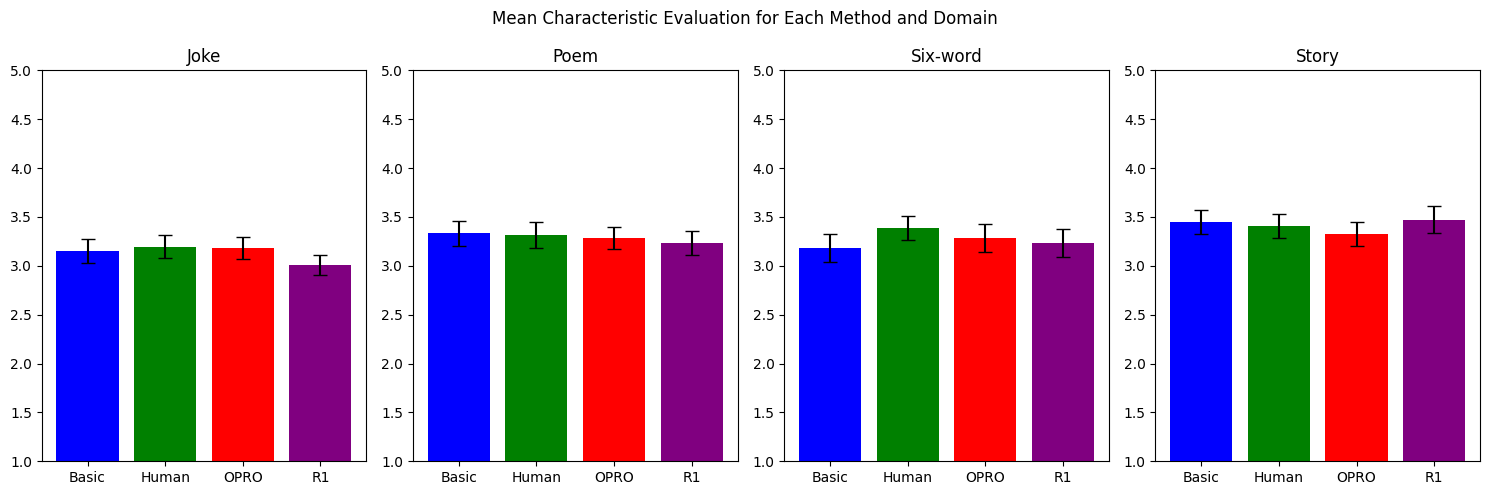

In [34]:
# Plot domain scores
def plot_domain_scores(domain_scores, save_path=None, title="", ylim=(1,5)):
    """Plot the mean scores for each method and domain. Let each method be a subplot."""
    methods = ["basic", "human", "opro", "r1"]
    domains = ["joke", "poem", "six-word", "story"]
    titles = ["Joke", "Poem", "Six-word", "Story"]
    xlabels = ["Basic", "Human", "OPRO", "R1"]
    # Generate subplots for each domain
    fig, axs = plt.subplots(1, len(domains), figsize=(15, 5))
    for i, domain in enumerate(domains):
        means = [domain_scores[f"{method}_{domain}"] for method in methods]
        errors = [domain_scores[f"{method}_{domain}_moe"] for method in methods]
        axs[i].bar(xlabels, means, yerr=errors, capsize=5, color=['blue', 'green', 'red', 'purple'])
        axs[i].set_title(titles[i])
        axs[i].set_ylim(ylim)

    plt.suptitle(title)
    plt.tight_layout()
    # Save the plot
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()
plot_domain_scores(domain_scores, save_path="figures/domain_scores.png", title="Mean Characteristic Evaluation for Each Method and Domain")


In [35]:
# Get domain preference scores
domain_pref_scores = get_domain_scores(pref_df)
domain_pref_scores

{'basic_joke': np.float64(2.6666666666666665),
 'basic_joke_moe': np.float64(0.36626644824650684),
 'basic_poem': np.float64(2.65625),
 'basic_poem_moe': np.float64(0.3897149883920547),
 'basic_six-word': np.float64(2.7941176470588234),
 'basic_six-word_moe': np.float64(0.3772170073726106),
 'basic_story': np.float64(2.7096774193548385),
 'basic_story_moe': np.float64(0.4084471918956776),
 'human_joke': np.float64(2.5833333333333335),
 'human_joke_moe': np.float64(0.3254979091928071),
 'human_poem': np.float64(2.75),
 'human_poem_moe': np.float64(0.4032968969590197),
 'human_six-word': np.float64(2.3529411764705883),
 'human_six-word_moe': np.float64(0.3192349563003809),
 'human_story': np.float64(2.5161290322580645),
 'human_story_moe': np.float64(0.4051717004347169),
 'opro_joke': np.float64(2.2777777777777777),
 'opro_joke_moe': np.float64(0.37944078410468124),
 'opro_poem': np.float64(2.125),
 'opro_poem_moe': np.float64(0.33799575297961665),
 'opro_six-word': np.float64(2.32352941

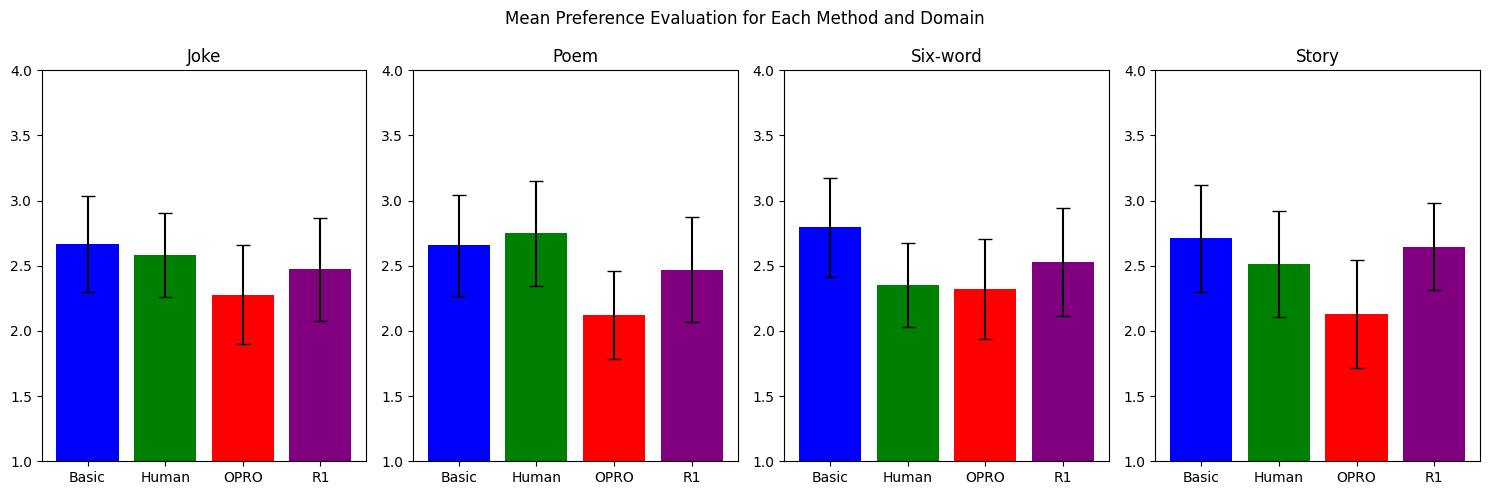

In [36]:
# Plot domain preference scores
plot_domain_scores(domain_pref_scores, save_path="figures/domain_pref_scores.png", title="Mean Preference Evaluation for Each Method and Domain", ylim=(1,4))

In [37]:
# Get combined artifact scores
# basic - `{domain}_eval.csv`
# human - `best_{domain}_eval.csv`
# opro - `{domain}_eval.csv`
# r1 - `best_{domain}.csv`

# Load each dataframe
methods = ["basic", "human", "opro", "r1"]
domains = ["joke", "poem", "six-word", "story"]
dfs = []
for method in methods:
    for domain in domains:
        if method == "basic" or method == "opro":
            file_name = f"artifacts/{method}/{domain}_eval.csv"
        else:
            file_name = f"artifacts/{method}/best_{domain}.csv"
        df = pd.read_csv(file_name)
        # Rename columns
        if domain == "joke":
            df = df.rename(columns={"funny": "quality", "original": "novelty"})
        else:
            df = df.rename(columns={"emotional": "quality", "original": "novelty"})
        df["method"] = method
        dfs.append(df)
combined_df = pd.concat(dfs, axis=0)
combined_df

,step,instruction,artifact,domain,novelty,creative,quality,valid,score,method
0,Step None,Write a joke. The joke must be completely new ...,Why did the spreadsheet apply for a job promot...,joke,25,75,75,Valid,58.333333,basic
1,Step None,Write a joke. The joke must be completely new ...,Why did the robot break up with its Roomba?\n\...,joke,75,75,75,Valid,75.000000,basic
2,Step None,Write a joke. The joke must be completely new ...,Why don't scientists trust atoms anymore? Beca...,joke,25,75,75,Valid,58.333333,basic
3,Step None,Write a joke. The joke must be completely new ...,Why did the introverted skeleton keep to himse...,joke,25,75,75,Valid,58.333333,basic
4,Step None,Write a joke. The joke must be completely new ...,Why did the mathematician plant a garden?\n\nB...,joke,25,25,75,Valid,41.666667,basic
...,...,...,...,...,...,...,...,...,...,...
5,Step None,Write a flash fiction story. The flash fiction...,In the dim glow of the library's closing hours...,story,75,75,75,Valid,75.000000,r1
6,Step None,Write a flash fiction story. The flash fiction...,The city’s neon drizzle soaked through my coat...,story,75,75,75,Valid,75.000000,r1
7,Step None,Write a flash fiction story. The flash fiction...,A Librarian's Dilemma\nClara swept dust from t...,story,75,75,75,Valid,75.000000,r1
8,Step None,Write a flash fiction story. The flash fiction...,"The clock ticked once, twice, thrice—each chim...",story,75,75,75,Valid,75.000000,r1


In [38]:
automatic_eval = combined_df
# Remap values to 1-5 scale
automatic_eval["quality"] = automatic_eval["quality"].map({0: 1, 25: 2, 50: 3, 75: 4, 100: 5})
automatic_eval["novelty"] = automatic_eval["novelty"].map({0: 1, 25: 2, 50: 3, 75: 4, 100: 5})
automatic_eval["creative"] = automatic_eval["creative"].map({0: 1, 25: 2, 50: 3, 75: 4, 100: 5})
# Group by method and domain
grouped = automatic_eval.groupby(["method", "domain"])[["quality", "novelty", "creative"]]
# Get mean quality, novelty, and creative scores
automatic_scores = grouped.mean()
automatic_std = grouped.std()
automatic_scores

quality  novelty  creative
method domain                              
basic  joke          3.6      2.2       3.8
       poem          4.0      2.0       3.6
       six-word      4.2      3.8       4.0
       story         4.0      2.4       4.0
human  joke          4.0      3.8       4.0
       poem          4.3      2.0       4.0
       six-word      4.9      4.0       4.1
       story         4.0      3.2       4.0
opro   joke          4.0      2.8       4.0
       poem          4.2      3.8       4.1
       six-word      4.5      4.0       4.4
       story         4.0      4.0       4.5
r1     joke          3.4      3.4       4.0
       poem          4.3      3.9       4.6
       six-word      4.8      4.0       4.3
       story         4.0      4.0       4.2

In [39]:
automatic_std

quality   novelty  creative
method domain                                
basic  joke      0.843274  0.632456  0.632456
       poem      0.000000  0.000000  0.843274
       six-word  0.421637  0.632456  0.000000
       story     0.000000  0.843274  0.000000
human  joke      0.000000  0.632456  0.000000
       poem      0.483046  0.000000  0.000000
       six-word  0.316228  0.000000  0.316228
       story     0.000000  1.032796  0.000000
opro   joke      0.000000  1.032796  0.000000
       poem      0.421637  0.632456  0.316228
       six-word  0.527046  0.000000  0.516398
       story     0.000000  0.000000  0.527046
r1     joke      0.966092  1.264911  0.000000
       poem      0.483046  0.737865  0.516398
       six-word  0.421637  0.000000  0.483046
       story     0.000000  0.000000  0.421637

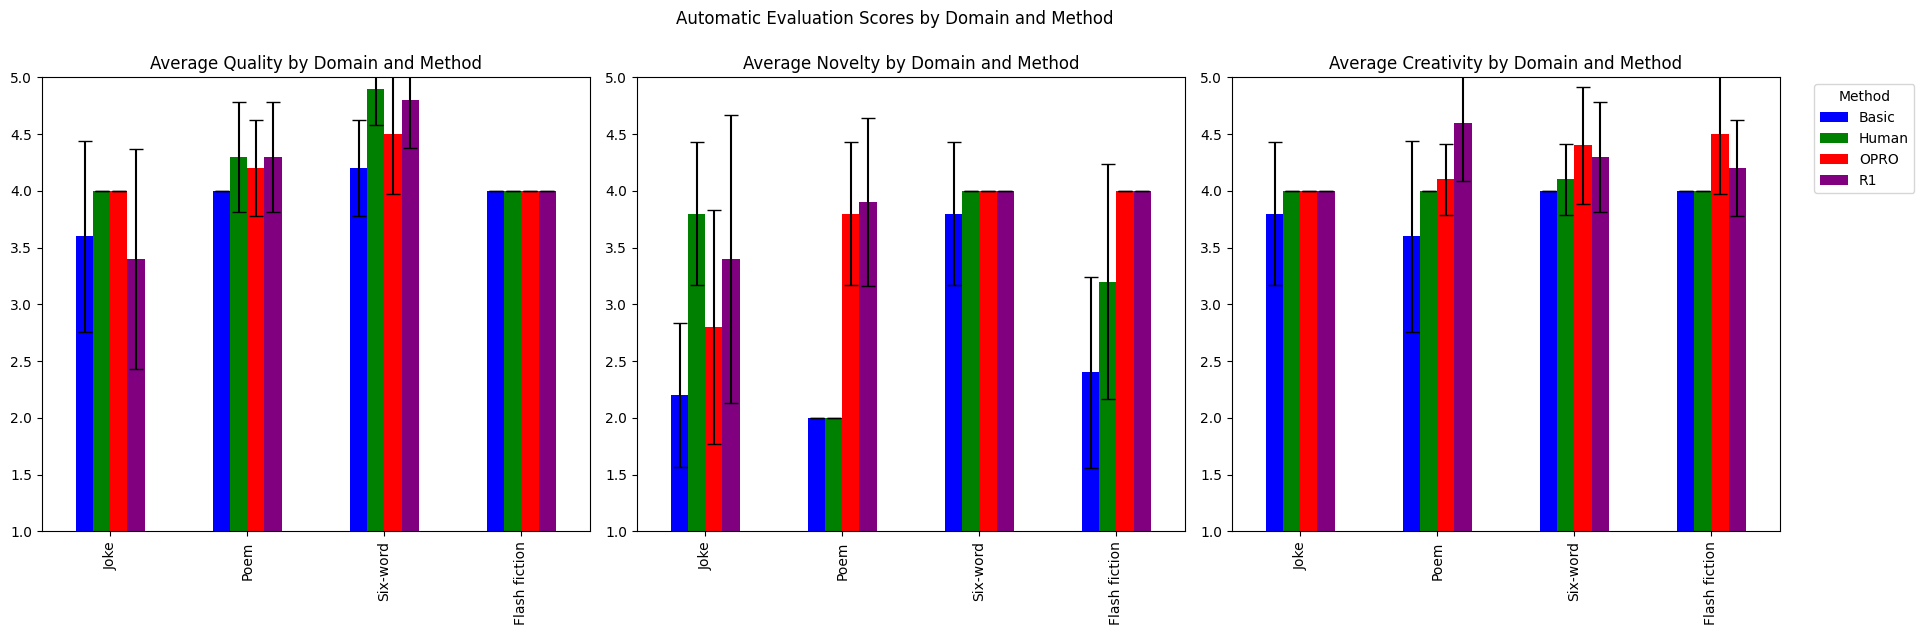

In [40]:
# Define the desired order for domains and methods
domain_order = ["joke", "poem", "six-word", "story"]
method_order = ["basic", "human", "opro", "r1"]

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of metrics to plot
metrics = ["quality", "novelty", "creative"]

# Loop over each metric and create a bar plot
for i, metric in enumerate(metrics):
    # Unstack the scores so domains are index and methods are columns
    scores = automatic_scores[metric].unstack(level="method")
    stds = automatic_std[metric].unstack(level="method")
    
    # Reindex to ensure domains are in the specified order
    scores = scores.reindex(domain_order)
    stds = stds.reindex(domain_order)
    
    # Select columns to ensure methods are in the specified order
    scores = scores[method_order]
    stds = stds[method_order]
    
    # Remap method values
    scores.columns = scores.columns.map({"basic": "Basic", "human": "Human", "opro": "OPRO", "r1": "R1"})
    stds.columns = stds.columns.map({"basic": "Basic", "human": "Human", "opro": "OPRO", "r1": "R1"})
    # Remap domain values
    scores.index = scores.index.map({"joke": "Joke", "poem": "Poem", "six-word": "Six-word", "story": "Flash fiction"})
    stds.index = stds.index.map({"joke": "Joke", "poem": "Poem", "six-word": "Six-word", "story": "Flash fiction"})
    # Plot bar chart with error bars on the corresponding subplot
    scores.plot(
        ylim=(1, 5),         # Set the y-axis limits
        xlabel="",
        kind="bar",
        legend=False,        # Do not show the legend
        yerr=stds,           # Add error bars using standard deviations
        ax=axes[i],          # Specify the subplot axis
        capsize=5,           # Add caps to error bars for visibility
        color=['blue', 'green', 'red', 'purple'],  # Set custom colors for methods
        title=f"Average {metric.capitalize() if metric != 'creative' else 'Creativity'} by Domain and Method"
    )

# Adjust the layout to prevent overlap
plt.tight_layout()
# Set title
plt.suptitle("Automatic Evaluation Scores by Domain and Method", y=1.05)
# Add legend to plot
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the plot
plt.savefig("figures/automatic_evaluation_scores.png", bbox_inches='tight')

# Display the plot
plt.show()

In [41]:
scores

method,Basic,Human,OPRO,R1
domain,,,,
Joke,3.8,4.0,4.0,4.0
Poem,3.6,4.0,4.1,4.6
Six-word,4.0,4.1,4.4,4.3
Flash fiction,4.0,4.0,4.5,4.2


In [42]:
mean_char_df = char_df.mean()

In [43]:
type(mean_char_df)

pandas.core.series.Series

In [44]:
mean_char_df.index

Index(['basic_joke_quality', 'basic_joke_novelty', 'basic_joke_creative',
       'human_joke_quality', 'human_joke_novelty', 'human_joke_creative',
       'opro_joke_quality', 'opro_joke_novelty', 'opro_joke_creative',
       'r1_joke_quality', 'r1_joke_novelty', 'r1_joke_creative',
       'basic_poem_quality', 'basic_poem_novelty', 'basic_poem_creative',
       'human_poem_quality', 'human_poem_novelty', 'human_poem_creative',
       'opro_poem_quality', 'opro_poem_novelty', 'opro_poem_creative',
       'r1_poem_quality', 'r1_poem_novelty', 'r1_poem_creative',
       'basic_six-word_quality', 'basic_six-word_novelty',
       'basic_six-word_creative', 'human_six-word_quality',
       'human_six-word_novelty', 'human_six-word_creative',
       'opro_six-word_quality', 'opro_six-word_novelty',
       'opro_six-word_creative', 'r1_six-word_quality', 'r1_six-word_novelty',
       'r1_six-word_creative', 'basic_story_quality', 'basic_story_novelty',
       'basic_story_creative', 'human_st

In [45]:
def process_char_df(char_df):
    mean_char_df = char_df.mean()
    std_char_df = char_df.std()
    new_df = []
    for idx, mean, std in zip(mean_char_df.index, mean_char_df, std_char_df):
        method = idx.split("_")[0]
        domain = idx.split("_")[1]
        characteristic = idx.split("_")[2]
        new_df.append([method, domain, characteristic, mean, std])
    new_df = pd.DataFrame(new_df, columns=["method", "domain", "characteristic", "mean_score", "std"])
    return new_df
processed_mean_char_df = process_char_df(char_df)
processed_mean_char_df

,method,domain,characteristic,mean_score,std
0,basic,joke,quality,3.083333,0.912871
1,basic,joke,novelty,3.150000,0.805965
2,basic,joke,creative,3.216667,0.801085
3,human,joke,quality,2.941667,0.919406
4,human,joke,novelty,3.400000,0.749229
5,human,joke,creative,3.250000,0.791233
6,opro,joke,quality,2.808333,0.946429
7,opro,joke,novelty,3.366667,0.709282
8,opro,joke,creative,3.366667,0.732594
9,r1,joke,quality,2.608333,0.964024


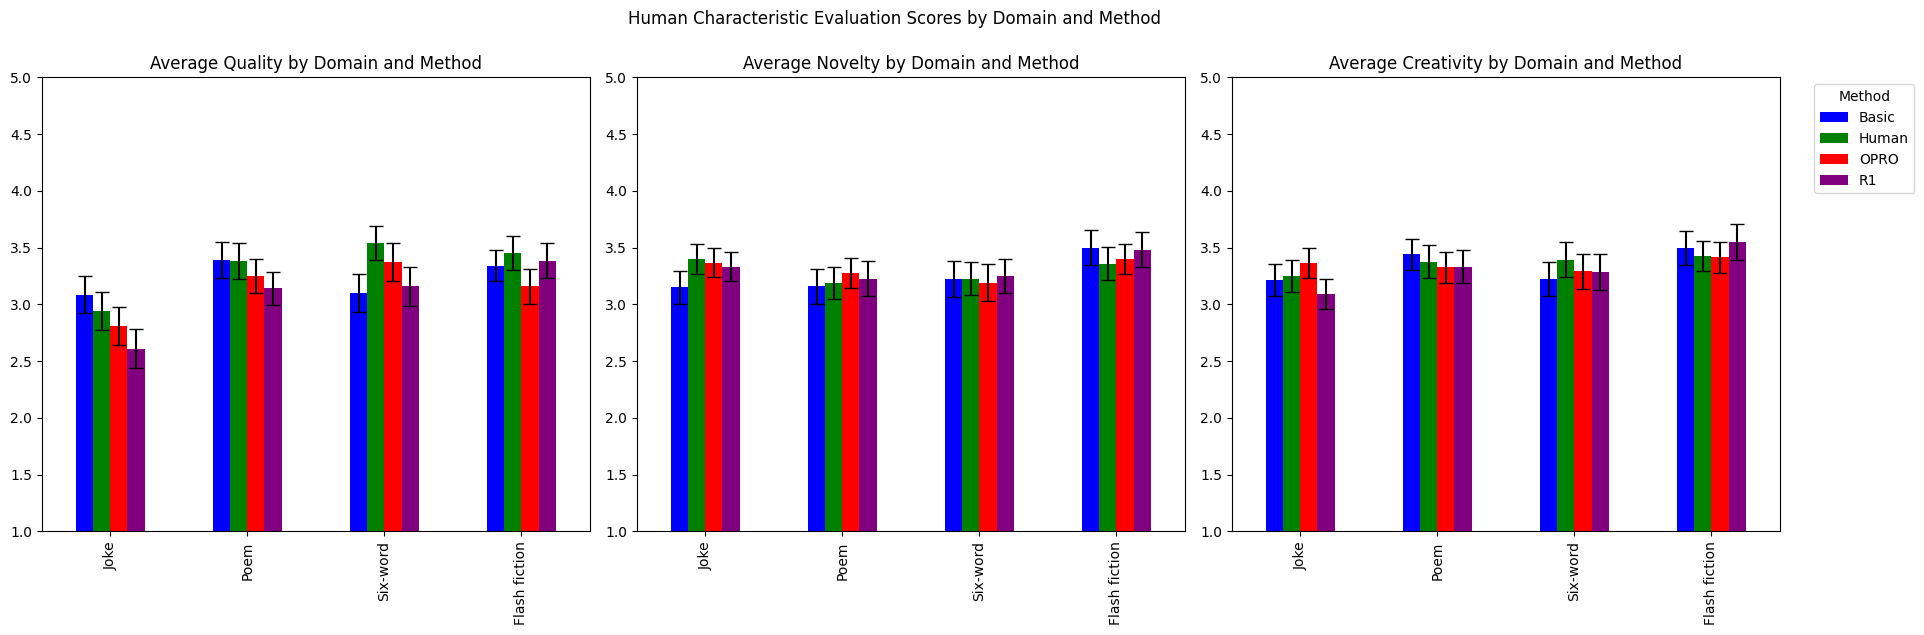

In [46]:
# Define the desired order for domains and methods
domain_order = ["joke", "poem", "six-word", "story"]
method_order = ["basic", "human", "opro", "r1"]

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of metrics to plot
metrics = ["quality", "novelty", "creative"]

# Loop over each metric and create a bar plot
for i, metric in enumerate(metrics):
    # Unstack the scores so domains are index and methods are columns
    scores = processed_mean_char_df[processed_mean_char_df["characteristic"] == metric].set_index(["domain", "method"])["mean_score"].unstack(level="method")
    stds = processed_mean_char_df[processed_mean_char_df["characteristic"] == metric].set_index(["domain", "method"])["std"].unstack(level="method") 
    
    # Reindex to ensure domains are in the specified order
    scores = scores.reindex(domain_order)
    stds = stds.reindex(domain_order)
    
    # Select columns to ensure methods are in the specified order
    scores = scores[method_order]
    stds = stds[method_order]

    # Compute margin of error
    stds = stds / (len(char_df) ** 0.5) * 1.96
    
    # Remap method values
    scores.columns = scores.columns.map({"basic": "Basic", "human": "Human", "opro": "OPRO", "r1": "R1"})
    stds.columns = stds.columns.map({"basic": "Basic", "human": "Human", "opro": "OPRO", "r1": "R1"})
    # Remap domain values
    scores.index = scores.index.map({"joke": "Joke", "poem": "Poem", "six-word": "Six-word", "story": "Flash fiction"})
    stds.index = stds.index.map({"joke": "Joke", "poem": "Poem", "six-word": "Six-word", "story": "Flash fiction"})
    # Plot bar chart with error bars on the corresponding subplot
    scores.plot(
        ylim=(1, 5),         # Set the y-axis limits
        xlabel="",
        kind="bar",
        legend=False,        # Do not show the legend
        yerr=stds,           # Add error bars using standard deviations
        ax=axes[i],          # Specify the subplot axis
        capsize=5,           # Add caps to error bars for visibility
        color=['blue', 'green', 'red', 'purple'],  # Set custom colors for methods
        title=f"Average {metric.capitalize() if metric != 'creative' else 'Creativity'} by Domain and Method"
    )

# Adjust the layout to prevent overlap
plt.tight_layout()
# Set title
plt.suptitle("Human Characteristic Evaluation Scores by Domain and Method", y=1.05)
# Add legend to plot
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the plot with legend and title 
plt.savefig("figures/human_evaluation_scores.png", bbox_inches='tight')
# fig.savefig('filename.png', bbox_inches='tight')

# Display the plot
plt.show()

In [47]:
processed_mean_char_df

,method,domain,characteristic,mean_score,std
0,basic,joke,quality,3.083333,0.912871
1,basic,joke,novelty,3.150000,0.805965
2,basic,joke,creative,3.216667,0.801085
3,human,joke,quality,2.941667,0.919406
4,human,joke,novelty,3.400000,0.749229
5,human,joke,creative,3.250000,0.791233
6,opro,joke,quality,2.808333,0.946429
7,opro,joke,novelty,3.366667,0.709282
8,opro,joke,creative,3.366667,0.732594
9,r1,joke,quality,2.608333,0.964024


In [48]:
automatic_scores

quality  novelty  creative
method domain                              
basic  joke          3.6      2.2       3.8
       poem          4.0      2.0       3.6
       six-word      4.2      3.8       4.0
       story         4.0      2.4       4.0
human  joke          4.0      3.8       4.0
       poem          4.3      2.0       4.0
       six-word      4.9      4.0       4.1
       story         4.0      3.2       4.0
opro   joke          4.0      2.8       4.0
       poem          4.2      3.8       4.1
       six-word      4.5      4.0       4.4
       story         4.0      4.0       4.5
r1     joke          3.4      3.4       4.0
       poem          4.3      3.9       4.6
       six-word      4.8      4.0       4.3
       story         4.0      4.0       4.2

In [49]:
automatic_scores["quality"]

method  domain  
basic   joke        3.6
        poem        4.0
        six-word    4.2
        story       4.0
human   joke        4.0
        poem        4.3
        six-word    4.9
        story       4.0
opro    joke        4.0
        poem        4.2
        six-word    4.5
        story       4.0
r1      joke        3.4
        poem        4.3
        six-word    4.8
        story       4.0
Name: quality, dtype: float64

In [50]:
processed_mean_char_df.columns

Index(['method', 'domain', 'characteristic', 'mean_score', 'std'], dtype='object')

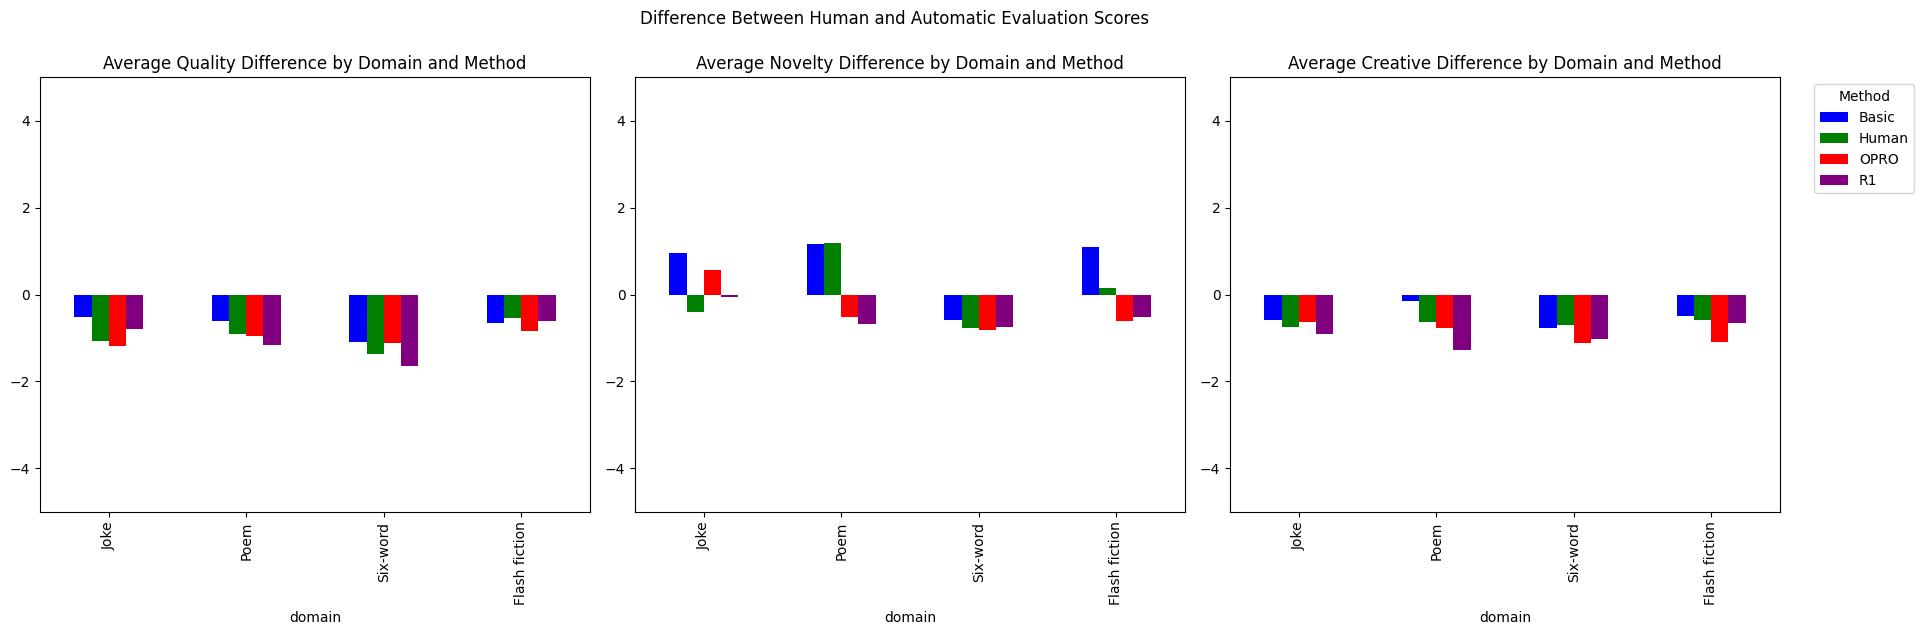

In [51]:
# Define the desired order for domains and methods
domain_order = ["joke", "poem", "six-word", "story"]
method_order = ["basic", "human", "opro", "r1"]

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of metrics to plot
metrics = ["quality", "novelty", "creative"]
diff_scores = {}

# Loop over each metric and create a bar plot
for i, metric in enumerate(metrics):
    # Unstack the scores so domains are index and methods are columns
    human_scores = processed_mean_char_df[processed_mean_char_df["characteristic"] == metric].set_index(["domain", "method"])["mean_score"].unstack(level="method")
    auto_scores = automatic_scores[metric].unstack(level="method")
    
    # Reindex to ensure domains are in the specified order
    human_scores = human_scores.reindex(domain_order)
    auto_scores = auto_scores.reindex(domain_order)
    
    # Select columns to ensure methods are in the specified order
    human_scores = human_scores[method_order]
    auto_scores = auto_scores[method_order]

    # Remap method values
    human_scores.columns = human_scores.columns.map({"basic": "Basic", "human": "Human", "opro": "OPRO", "r1": "R1"})
    auto_scores.columns = auto_scores.columns.map({"basic": "Basic", "human": "Human", "opro": "OPRO", "r1": "R1"})
    # Remap domain values
    human_scores.index = human_scores.index.map({"joke": "Joke", "poem": "Poem", "six-word": "Six-word", "story": "Flash fiction"})
    auto_scores.index = auto_scores.index.map({"joke": "Joke", "poem": "Poem", "six-word": "Six-word", "story": "Flash fiction"})

    # Get the difference betwen human and automatic scores
    diff_score = human_scores - auto_scores
    
    # Plot bar chart with error bars on the corresponding subplot
    diff_score.plot(
        ylim=(-5, 5),         # Set the y-axis limits
        kind="bar",
        legend=False,        # Do not show the legend
        ax=axes[i],          # Specify the subplot axis
        capsize=5,           # Add caps to error bars for visibility
        color=['blue', 'green', 'red', 'purple'],  # Set custom colors for methods
        title=f"Average {metric.capitalize()} Difference by Domain and Method"
    )
    diff_scores[metric] = diff_score

# Adjust the layout to prevent overlap
plt.tight_layout()
# Set title
plt.suptitle("Difference Between Human and Automatic Evaluation Scores", y=1.05)
# Add legend to plot
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the plot with legend and title 
plt.savefig("figures/diff_scores.png", bbox_inches='tight')
# fig.savefig('filename.png', bbox_inches='tight')

# Display the plot
plt.show()

In [52]:
diff_scores

{'quality': method            Basic     Human      OPRO        R1
 domain                                               
 Joke          -0.516667 -1.058333 -1.191667 -0.791667
 Poem          -0.608333 -0.916667 -0.950000 -1.158333
 Six-word      -1.100000 -1.358333 -1.125000 -1.641667
 Flash fiction -0.658333 -0.550000 -0.841667 -0.616667,
 'novelty': method            Basic     Human      OPRO        R1
 domain                                               
 Joke           0.950000 -0.400000  0.566667 -0.066667
 Poem           1.158333  1.191667 -0.525000 -0.675000
 Six-word      -0.575000 -0.775000 -0.808333 -0.750000
 Flash fiction  1.100000  0.158333 -0.600000 -0.516667,
 'creative': method            Basic     Human      OPRO        R1
 domain                                               
 Joke          -0.583333 -0.750000 -0.633333 -0.908333
 Poem          -0.158333 -0.625000 -0.775000 -1.266667
 Six-word      -0.775000 -0.708333 -1.108333 -1.016667
 Flash fiction -0.500000 -0.5

In [53]:
(diff_scores["novelty"]["Basic"]["Joke"] + diff_scores["novelty"]["Basic"]["Poem"] + diff_scores["novelty"]["Basic"]["Flash fiction"]) / 3

np.float64(1.0694444444444444)

In [54]:
diff_scores["novelty"]["Human"]["Poem"]

np.float64(1.1916666666666669)

In [55]:
diff_scores["novelty"]["OPRO"]["Joke"]

np.float64(0.5666666666666669)

In [56]:

def create_table(dfs):
    """
    Convert a dictionary of DataFrames into a single DataFrame suitable for a research paper.
    
    Parameters:
    dfs (dict): Dictionary with keys 'quality', 'novelty', 'creative', each containing a DataFrame
                with 'domain' as index and 'method' as columns.
    
    Returns:
    pd.DataFrame: A DataFrame with domains as rows and multi-index columns (aspect, method).
    """
    # List of aspects from the dictionary keys
    aspects = list(dfs.keys())
    
    # Prepare a list to hold DataFrames with updated column indices
    combined_dfs = []
    
    # For each aspect, add the aspect as the top level of the column index
    for aspect in aspects:
        df = dfs[aspect]
        # Create a MultiIndex with the aspect and existing method names
        df.columns = pd.MultiIndex.from_product([[aspect], df.columns])
        combined_dfs.append(df)
    
    # Concatenate all DataFrames along the columns
    combined_df = pd.concat(combined_dfs, axis=1)
    
    return combined_df
# Create the table
table_df = create_table(diff_scores)
table_df

quality                                 novelty            \
method            Basic     Human      OPRO        R1     Basic     Human   
domain                                                                      
Joke          -0.516667 -1.058333 -1.191667 -0.791667  0.950000 -0.400000   
Poem          -0.608333 -0.916667 -0.950000 -1.158333  1.158333  1.191667   
Six-word      -1.100000 -1.358333 -1.125000 -1.641667 -0.575000 -0.775000   
Flash fiction -0.658333 -0.550000 -0.841667 -0.616667  1.100000  0.158333   

                                   creative                                
method             OPRO        R1     Basic     Human      OPRO        R1  
domain                                                                     
Joke           0.566667 -0.066667 -0.583333 -0.750000 -0.633333 -0.908333  
Poem          -0.525000 -0.675000 -0.158333 -0.625000 -0.775000 -1.266667  
Six-word      -0.808333 -0.750000 -0.775000 -0.708333 -1.108333 -1.016667  
Flash fiction -0.600000 -0.516667 -0.500000 -0.575000 -1.083333 -0.650000

In [57]:
table_df.to_latex("tables/diff_scores.tex", index=True, escape=False)

In [58]:
def compute_mean_by_method(dfs):
    """
    Compute the mean value for each method across all domains for each aspect.

    Parameters:
    dfs (dict): Dictionary with aspects as keys and DataFrames as values.
                Each DataFrame should have domains as rows and methods as columns.

    Returns:
    pd.DataFrame: A DataFrame with aspects as rows and methods as columns,
                  containing the mean values across domains.
    """
    # Calculate the mean for each method (column) across domains (rows) per aspect
    means = {aspect: df.mean(axis=0) for aspect, df in dfs.items()}
    # Convert dictionary of Series to a DataFrame with aspects as rows and methods as columns
    mean_df = pd.DataFrame.from_dict(means, orient='index')
    return mean_df
# Compute the mean values
mean_df = compute_mean_by_method(diff_scores)
mean_df

quality                                 novelty                     \
             Basic     Human      OPRO        R1     Basic    Human      OPRO   
quality  -0.720833 -0.970833 -1.027083 -1.052083       NaN      NaN       NaN   
novelty        NaN       NaN       NaN       NaN  0.658333  0.04375 -0.341667   
creative       NaN       NaN       NaN       NaN       NaN      NaN       NaN   

                    creative                           
                R1     Basic     Human OPRO        R1  
quality        NaN       NaN       NaN  NaN       NaN  
novelty  -0.502083       NaN       NaN  NaN       NaN  
creative       NaN -0.504167 -0.664583 -0.9 -0.960417

In [59]:
mean_df = mean_df.mean()
mean_df

quality   Basic   -0.720833
          Human   -0.970833
          OPRO    -1.027083
          R1      -1.052083
novelty   Basic    0.658333
          Human    0.043750
          OPRO    -0.341667
          R1      -0.502083
creative  Basic   -0.504167
          Human   -0.664583
          OPRO    -0.900000
          R1      -0.960417
dtype: float64

In [61]:
!pip install umap-learn sentence-transformers

In [62]:
# Load all artifacts df
artifacts_df = pd.read_csv('artifacts/all_artifacts.csv')
artifacts_df

,Method,Domain,Artifact text,Score
0,basic,joke,Why did the spreadsheet apply for a job promot...,58.333333
1,basic,joke,Why did the robot break up with its Roomba?\n\...,75.000000
2,basic,joke,Why don't scientists trust atoms anymore? Beca...,58.333333
3,basic,joke,Why did the introverted skeleton keep to himse...,58.333333
4,basic,joke,Why did the mathematician plant a garden?\n\nB...,58.333333
...,...,...,...,...
155,r1,flash fiction,In the dim glow of the library's closing hours...,75.000000
156,r1,flash fiction,The city’s neon drizzle soaked through my coat...,75.000000
157,r1,flash fiction,A Librarian's Dilemma\nClara swept dust from t...,75.000000
158,r1,flash fiction,"The clock ticked once, twice, thrice—each chim...",75.000000


In [63]:
import umap
from sentence_transformers import SentenceTransformer

/home/rob/miniconda3/envs/opro/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [69]:
# Check and clean missing values
artifacts_df = artifacts_df.dropna(subset=['Artifact text'])

# Load embedding model
print("Loading model...")
# model = SentenceTransformer("all-MiniLM-L6-v2")
model = SentenceTransformer("all-mpnet-base-v2")

# Generate sentence embeddings
print("Generating embeddings...")
embeddings = model.encode(artifacts_df["Artifact text"].astype(str).tolist(), show_progress_bar=True)


Loading model...
Generating embeddings...


Batches: 100%|██████████| 5/5 [00:21<00:00,  4.39s/it]


In [ ]:
# Pairwise distance
print("Calculating pairwise distances...")
from sklearn.metrics import pairwise_distances
import numpy as np
# Calculate pairwise distances
pairwise_dist = pairwise_distances(embeddings, metric='cosine')

Calculating pairwise distances...


np.float32(0.6852922)

In [97]:

pairwise_dist.mean(axis=1)

array([0.88686454, 0.83004284, 0.87437916, 0.8137293 , 0.8333769 ,
       0.89666426, 0.8429602 , 0.77424014, 0.90214044, 0.80966425,
       0.58652735, 0.58887035, 0.56480426, 0.5646968 , 0.57669044,
       0.59252465, 0.5813542 , 0.5918215 , 0.57102853, 0.5671005 ,
       0.8593296 , 0.6347203 , 0.62925863, 0.6474878 , 0.712119  ,
       0.76706076, 0.6862923 , 0.67607147, 0.7864869 , 0.6305758 ,
       0.61094457, 0.61024773, 0.63438785, 0.6240572 , 0.57943505,
       0.5737415 , 0.57724345, 0.63779545, 0.60905993, 0.5621783 ,
       0.82971907, 0.7977396 , 0.786101  , 0.8315358 , 0.8996585 ,
       0.87782085, 0.80562496, 0.84191686, 0.7798261 , 0.8046624 ,
       0.54929024, 0.5631043 , 0.548344  , 0.54755783, 0.54861844,
       0.5655269 , 0.52402896, 0.5542966 , 0.53973895, 0.57996017,
       0.6669694 , 0.7347925 , 0.6412467 , 0.62890136, 0.7333104 ,
       0.80930936, 0.6955848 , 0.6411604 , 0.71491766, 0.6527195 ,
       0.55733854, 0.58762836, 0.5811152 , 0.5365853 , 0.58738

In [70]:
embeddings.shape

(160, 768)

Running UMAP...


/home/rob/miniconda3/envs/opro/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/rob/miniconda3/envs/opro/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Creating plot...


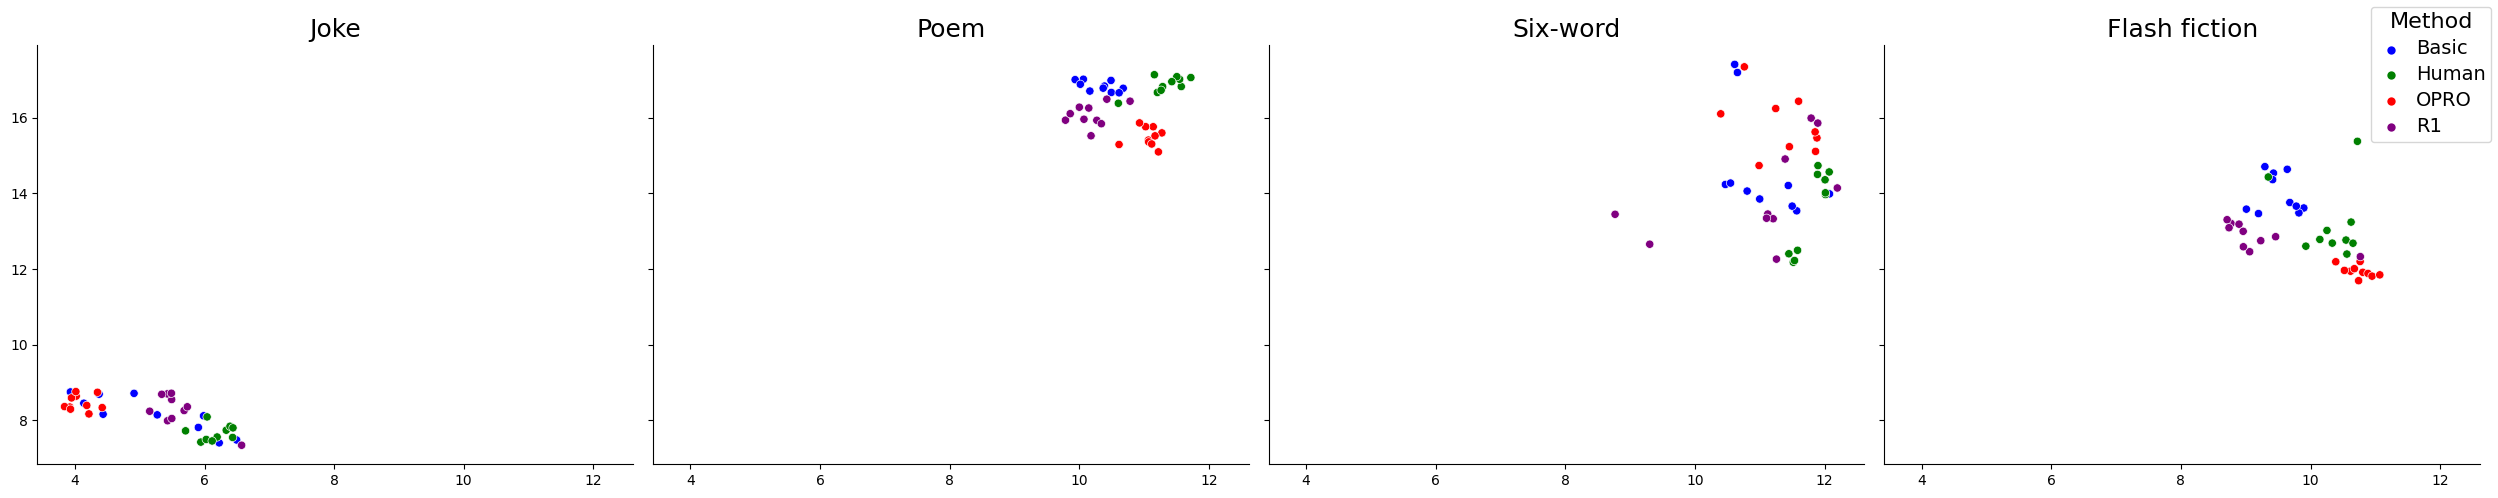

In [93]:
# Reduce to 2D with UMAP
print("Running UMAP...")
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="cosine", random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

# Add to DataFrame
artifacts_df["x"] = embedding_2d[:, 0]
artifacts_df["y"] = embedding_2d[:, 1]
# Labels for legend
artifacts_df["Method"] = artifacts_df["Method"].replace({
    "basic": "Basic",
    "human": "Human",
    "opro": "OPRO",
    "r1": "R1"
})
artifacts_df["Domain"] = artifacts_df["Domain"].replace({
    "joke": "Joke",
    "poem": "Poem",
    "six-word story": "Six-word",
    "flash fiction": "Flash fiction"
})

custom_palette = {
    "Basic": "blue",      # blue
    "R1": "purple",      # orange
    "Human": "green",       # green
    "OPRO": "red"          # red
}

# Plot
print("Creating plot...")
g = sns.relplot(
    data=artifacts_df,
    x="x", y="y",
    hue="Method",
    hue_order=["Basic", "Human", "OPRO", "R1"],
    col="Domain",
    kind="scatter",
    height=5,
    aspect=1.2,
    palette=custom_palette,
)
g.set_titles(col_template="{col_name}", size=18)
# g.set_axis_labels("UMAP-1", "UMAP-2")
g.set_axis_labels("", "")

# Adjust legend font sizes and position
# g._legend.set_bbox_to_anchor((1, 0))  # bottom-right corner
g._legend.set_loc('upper right')
g._legend.set_frame_on(True)

plt.setp(g._legend.get_texts(), fontsize=14)  # Legend text size
plt.setp(g._legend.get_title(), fontsize=16)  # Legend title size


plt.tight_layout()
plt.show()
# Save the plot
g.savefig("figures/umap_embeddings.png", bbox_inches='tight')

In [99]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
import numpy as np

# Function to compute intra-method diversity per domain
def compute_intra_method_diversity(df, domain, embed_model):
    print(f"\nDiversity within domain: {domain}")
    domain_df = df[df['Domain'] == domain]
    results = []

    for method in domain_df['Method'].unique():
        method_df = domain_df[domain_df['Method'] == method]
        # coords = method_df[['x', 'y']].values
        embeds = embed_model.encode(method_df['Artifact text'].astype(str).tolist(), show_progress_bar=False)

        if len(embeds) > 1:
            # Mean pairwise distance
            dists = pdist(embeds, metric='cosine')
            mean_pairwise = np.mean(dists)

            # Mean distance to centroid
            centroid = np.mean(embeds, axis=0)
            mean_to_centroid = np.mean(np.linalg.norm(embeds - centroid, axis=1))

            results.append({
                'Method': method,
                'Mean Pairwise Distance': mean_pairwise,
                'Mean Distance to Centroid': mean_to_centroid,
                'Sample Count': len(embeds)
            })
    return pd.DataFrame(results)

# Function to compute silhouette score per domain
# def compute_silhouette(df, domain, embed_model):
#     domain_df = df[df['Domain'] == domain]
#     if domain_df['Method'].nunique() > 1:
#         labels = domain_df['Method'].astype('category').cat.codes
#         embeds = embed_model.encode(domain_df['Artifact text'].astype(str).tolist(), show_progress_bar=False) 
#         score = silhouette_score(coords, labels)
#         return score
#     else:
#         return None

# Run metrics
all_domains = artifacts_df['Domain'].unique()
for domain in all_domains:
    diversity_df = compute_intra_method_diversity(artifacts_df, domain, model)
    print(diversity_df)
    # sil_score = compute_silhouette(artifacts_df, domain)
    # if sil_score is not None:
    #     print(f"Silhouette Score for domain '{domain}': {sil_score:.3f}")
    # else:
    #     print(f"Not enough methods for silhouette score in domain '{domain}'.")



Diversity within domain: Joke
  Method  Mean Pairwise Distance  Mean Distance to Centroid  Sample Count
0  Basic                0.749219                   0.819988            10
1   OPRO                0.521633                   0.671818            10
2  Human                0.596083                   0.722033            10
3     R1                0.776805                   0.834567            10

Diversity within domain: Poem
  Method  Mean Pairwise Distance  Mean Distance to Centroid  Sample Count
0  Basic                0.200334                   0.422547            10
1   OPRO                0.188960                   0.409239            10
2  Human                0.171913                   0.389577            10
3     R1                0.323676                   0.536221            10

Diversity within domain: Six-word
  Method  Mean Pairwise Distance  Mean Distance to Centroid  Sample Count
0  Basic                0.631895                   0.750392            10
1   OPRO       

In [101]:
all_diversity_dfs = []
silhouette_scores = []

for domain in all_domains:
    diversity_df = compute_intra_method_diversity(artifacts_df, domain, model)
    diversity_df['Domain'] = domain
    all_diversity_dfs.append(diversity_df)

    # sil_score = compute_silhouette(artifacts_df, domain)
    # silhouette_scores.append({'Domain': domain, 'Silhouette Score': sil_score})

# Combine and save
diversity_results = pd.concat(all_diversity_dfs, ignore_index=True)
silhouette_df = pd.DataFrame(silhouette_scores)

# Save to CSV
diversity_results.to_csv("tables/diversity_metrics_by_method.csv", index=False)
# silhouette_df.to_csv("tables/silhouette_scores_by_domain.csv", index=False)

print("\n✅ Metrics saved as 'diversity_metrics_by_method.csv' and 'silhouette_scores_by_domain.csv'")



Diversity within domain: Joke

Diversity within domain: Poem

Diversity within domain: Six-word

Diversity within domain: Flash fiction

✅ Metrics saved as 'diversity_metrics_by_method.csv' and 'silhouette_scores_by_domain.csv'


In [102]:
diversity_results

,Method,Mean Pairwise Distance,Mean Distance to Centroid,Sample Count,Domain
0,Basic,0.749219,0.819988,10,Joke
1,OPRO,0.521633,0.671818,10,Joke
2,Human,0.596083,0.722033,10,Joke
3,R1,0.776805,0.834567,10,Joke
4,Basic,0.200334,0.422547,10,Poem
5,OPRO,0.188960,0.409239,10,Poem
6,Human,0.171913,0.389577,10,Poem
7,R1,0.323676,0.536221,10,Poem
8,Basic,0.631895,0.750392,10,Six-word
9,OPRO,0.606993,0.735823,10,Six-word


In [105]:
# Mean pairwise distance by method
mean_pairwise = diversity_results.groupby('Method')['Mean Pairwise Distance'].mean()
mean_pairwise

Method
Basic    0.493304
Human    0.446733
OPRO     0.375725
R1       0.570773
Name: Mean Pairwise Distance, dtype: float64

In [106]:
# Mean distance to centroid by method
mean_centroid = diversity_results.groupby('Method')['Mean Distance to Centroid'].mean()
mean_centroid

Method
Basic    0.645266
Human    0.614211
OPRO     0.555517
R1       0.701707
Name: Mean Distance to Centroid, dtype: float32

In [107]:
# Create latex table
def create_diversity_table(df):
    """
    Create a LaTeX table from the diversity metrics DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing diversity metrics.
    
    Returns:
    None
    """
    # Pivot the DataFrame to have methods as columns and metrics as rows
    pivot_df = df.pivot(index='Domain', columns='Method', values=['Mean Pairwise Distance', 'Mean Distance to Centroid'])
    
    # Flatten the MultiIndex columns
    pivot_df.columns = [f"{metric} ({method})" for metric, method in pivot_df.columns]
    
    # Save as LaTeX table
    pivot_df.to_latex("tables/diversity_metrics_table.tex", index=True, escape=False)
    print("\n✅ LaTeX table saved as 'diversity_metrics_table.tex'")
create_diversity_table(diversity_results)


✅ LaTeX table saved as 'diversity_metrics_table.tex'
